In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import os

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from google.colab import files
uploaded=files.upload()

Saving insurance.csv - insurance.csv.csv to insurance.csv - insurance.csv (1).csv


In [28]:
df=pd.read_csv('insurance.csv - insurance.csv.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [31]:
sns.set()

In [32]:
df.isna().apply(pd.value_counts) #to check null values

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


Does bmi of males differ significantly from that of females?

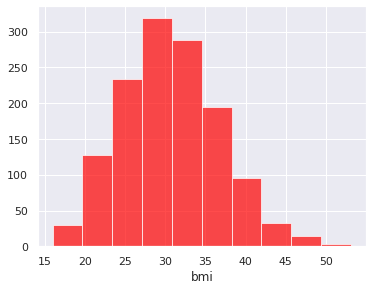

In [33]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='red', edgecolor = 'white', alpha = 0.7)
plt.xlabel('bmi')
plt.show()

In [34]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


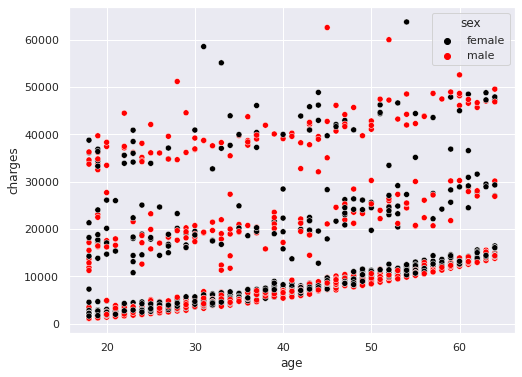

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age,df.charges,hue=df.sex,palette= ['black','red'] )
plt.show()

In [36]:
# T-test to check dependency of bmi on gender
x="Gender has no effect on bmi" #null hypothesis
y="Gender has an effect on bmi" #alternate hypothesis
a= np.array(df[df.sex == 'male'].bmi)  
b= np.array(df[df.sex == 'female'].bmi) 
t, p_value = stats.ttest_ind(a,b, axis = 0)  #Performing an Independent t-test
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{x} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{y} as the p_value ({p_value.round(3)}) > 0.05')

Gender has an effect on bmi as the p_value (0.09) > 0.05


Is the proportion of smokers significantly different in different genders?

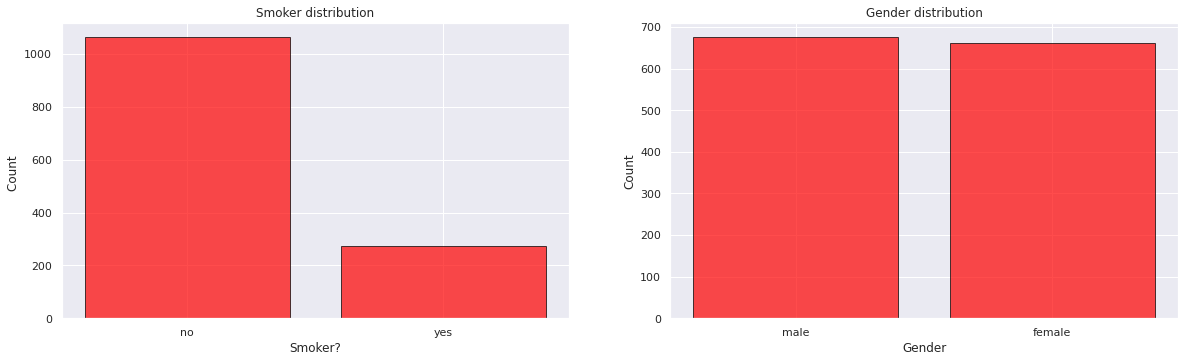

In [37]:
plt.figure(figsize=(20,25))
x=df.smoker.value_counts().index    #x-axis
y=[df['smoker'].value_counts()[i] for i in x]   # Count on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7) 
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1=df.sex.value_counts().index    #x-axis
y1=[df['sex'].value_counts()[j] for j in x1] #yaxis 
plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7) 

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2=df.region.value_counts().index    #x-axis
y2=[df['region'].value_counts()[k] for k in x2]   # Count on y-axis
plt.show()

In [38]:
# Chi_square test to check if smoking habits are different for different genders
x="Gender has no effect on smoking habits"   
y="Gender has an effect on smoking habits"   
z=pd.crosstab(df['sex'],df['smoker'])  # Contingency table 
chi, p_value, dof, expected=stats.chi2_contingency(z)
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{x} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{y} as the p_value ({p_value.round(3)}) > 0.05')
z

Gender has no effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159
